<a href="https://colab.research.google.com/github/darkmanees/Mobile-Net-model-to-detect-diseases-in-Paddy-plant./blob/main/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
train_path= '/content/drive/My Drive/data'
valid_path='/content/drive/My Drive/validation'
test_path='/content/drive/My Drive/test'

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
    rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
      horizontal_flip=True,
       fill_mode='nearest')

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batchsize = 62
val_batchsize = 10

In [ ]:

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)


Found 1599 images belonging to 4 classes.
Found 282 images belonging to 4 classes.


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,  rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
      horizontal_flip=True,
       fill_mode='nearest').flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=54)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=18)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1599 images belonging to 4 classes.
Found 282 images belonging to 4 classes.
Found 68 images belonging to 4 classes.


In [ ]:
print (train_generator.class_indices)

{'BrownSpot': 0, 'Healthy': 1, 'Hispa': 2, 'LeafBlast': 3}


In [ ]:
base_model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
base_model.summary()

In [ ]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [ ]:
for layer in base_model.layers:
    print(layer, layer.trainable)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(base_model)

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
x = Flatten()(last)
x=Dropout(0.5)(x)

x= Dense(units=4, activation='softmax')(x)
model = Model(base_model.input, x)


In [ ]:
model.summary()

In [ ]:
len(model.layers)

6

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

In [ ]:
history = model.fit(
      train_batches,
      steps_per_epoch=len(train_batches),
      epochs=30,
      validation_data=valid_batches,
      validation_steps=len(valid_batches),
      verbose=1)

Epoch 1/30
30/30 [==============================] - 263s 9s/step - loss: 1172.3408 - accuracy: 0.2608 - val_loss: 190.8869 - val_accuracy: 0.2837
Epoch 2/30
30/30 [==============================] - 222s 7s/step - loss: 298.6965 - accuracy: 0.3008 - val_loss: 52.1306 - val_accuracy: 0.4504
Epoch 3/30
30/30 [==============================] - 219s 7s/step - loss: 42.2519 - accuracy: 0.2939 - val_loss: 2.1655 - val_accuracy: 0.2589
Epoch 4/30
30/30 [==============================] - 229s 8s/step - loss: 1.9305 - accuracy: 0.2545 - val_loss: 1.8292 - val_accuracy: 0.2695
Epoch 5/30
30/30 [==============================] - 222s 7s/step - loss: 1.6833 - accuracy: 0.2508 - val_loss: 1.5390 - val_accuracy: 0.2624
Epoch 6/30
30/30 [==============================] - 221s 7s/step - loss: 2.2380 - accuracy: 0.2495 - val_loss: 2.1485 - val_accuracy: 0.2482
Epoch 7/30
30/30 [==============================] - 220s 7s/step - loss: 2.4957 - accuracy: 0.2495 - val_loss: 1.6682 - val_accuracy: 0.2553
Epoc

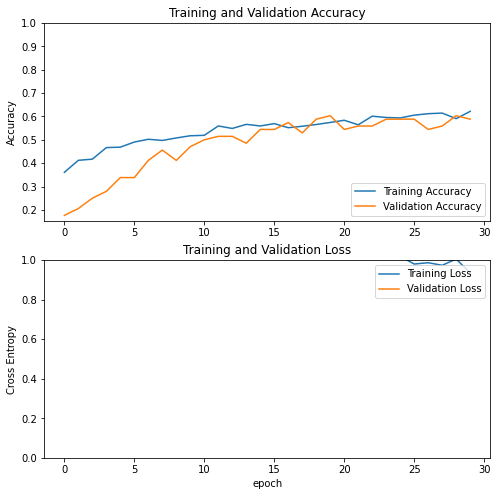

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)